<a href="https://colab.research.google.com/github/rogemaro/Compra-de-laptos-en-Europa/blob/main/Precio_de_las_laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurando El Ambiente De Trabajo En La Nube**

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/Personal Projects/data"
!ls

/content/drive/My Drive/Colab Notebooks/Personal Projects/data
homicidios_departamento_t.xlsx	homicidios.xls	       hurto_personas_2021.csv
homicidios_departamento.xlsx	hurto_a_personas.xlsx  laptop.csv


**Cargando Los Datos**

In [ ]:
#Importamos las librerias que nos van a permitir realizar el análisis y manipulación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_original = pd.read_csv("laptop.csv", encoding = "latin-1")
df_original

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [16]:
df = df_original.copy(deep = True)

In [17]:
df

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


**Exploración De Los Datos**

In [20]:
# Qué columnas tienen los datos?
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [21]:
# Qué tamaño tienen los datos?
df.shape

(1303, 13)

In [22]:
# Hay valores nulos en los datos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [23]:
# Cómo se distribuyen las variables númericas?
df.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [25]:
# Cómo se describen las variables categóricas?
df.describe(include = ["O"])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


**Procesamiento De Datos**

In [26]:
# Procedemos a elinar la columna "unnamed: 0" ya que es una columna de indice que viene desde el data frame y no tiene ninguna relevancia
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [27]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**EDA**

In [45]:
df["Price_euros"].mean()

1123.6869915579434

El precio promedio de todas las marcas vendidas en Europa, ronda los 1123.68 Euros

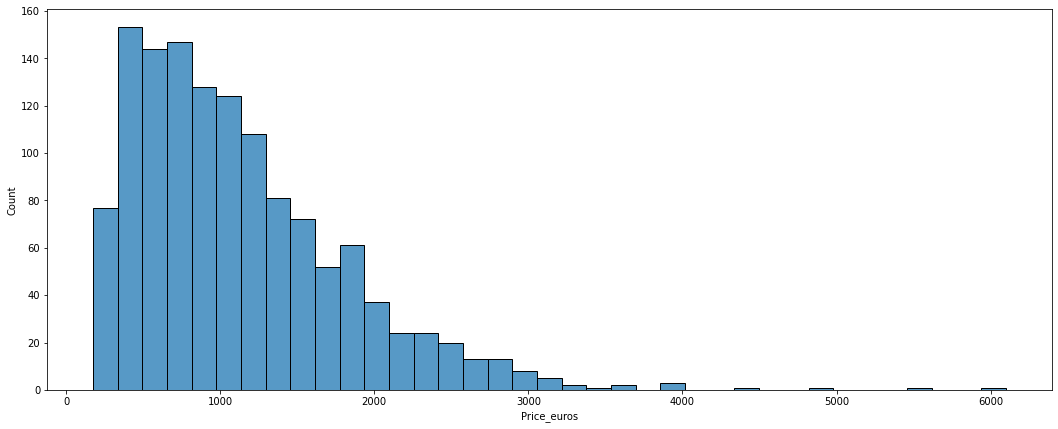

In [41]:
sns.histplot(df["Price_euros"])

Cuando se realiza el análisis del histograma de distribución nos podemos dar cuenta que la mayoria de laptops vendidas se encuentran en el rango de precios de 400 a 1200 euros.

In [30]:
df.groupby(["Company"])["Price_euros"].mean().to_frame().sort_values("Price_euros", ascending = False)

,Price_euros
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


En promedio la marca más costosa es Razer ubicandose alrededor de 3346 euros por laptop, de otra parte la marca más económica es Vero, con un promedio de 217 euros por laptop.

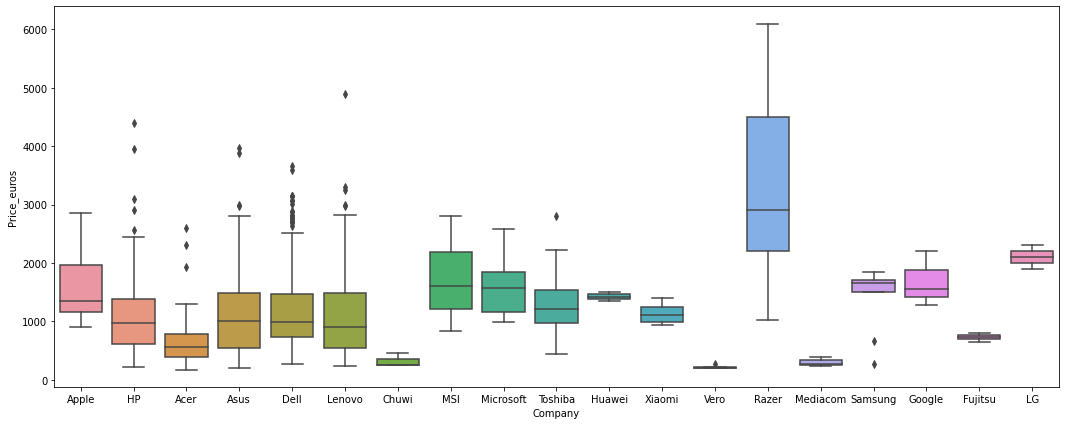

In [42]:
sns.boxplot(x = "Company", y = "Price_euros", data = df)

Cuando se desglosa el precio por marca en un gráfico de cajas y bigotes, nos podemos dar cuenta que en la marca Razer, que es la más costosa, existe un rango extendido de precios, entre su laptop más económica y la más costosa, llegando hasta superar los 6000 euros. De otra parte un dato interesante es que las marcas que llevan mpas tiempo en el mercado: Asus, HP, Dell y Lenovo, a pesar de que sus rangos no son tan extendidos, tienen datos atipicos, llegando a vender modelos entre los 4000 y 5000 euros. De otra parte Apple y las marcas nuevas tienen mucha consistencia entre los precios de sus laptops. 

In [46]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 5 #cambiamos la relación de aspecto y tamaño de los gráficos

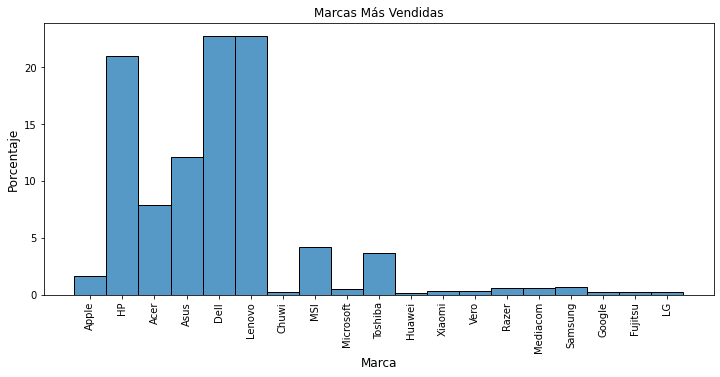

In [47]:
sns.histplot(
    data = df,
        x = "Company",
        stat = "percent")

plt.title("Marcas Más Vendidas", fontsize = 12)
plt.ylabel("Porcentaje", fontsize = 12)
plt.xlabel("Marca", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()

Dentro del porcentaje de participación de mercado de las marcas, encontramos que las más vendidas en Europa son Dell y Lenovo, seguido de HP, Asus y Acer. Las menos cendidas son Huawei, Google, Gujitsu y LG.

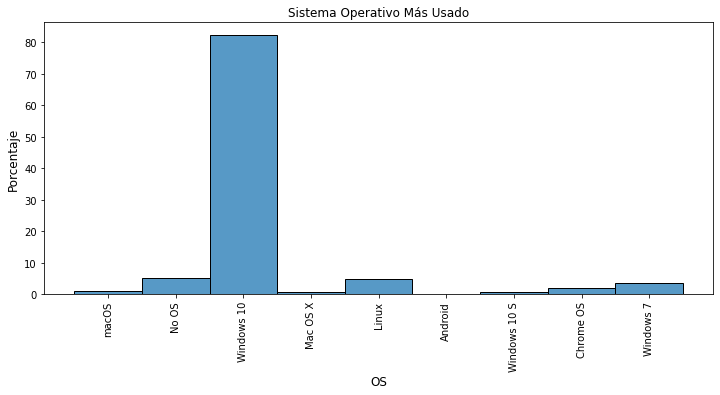

In [48]:
sns.histplot(
    data = df,
        x = "OpSys",
        stat = "percent")

plt.title("Sistema Operativo Más Usado", fontsize = 12)
plt.ylabel("Porcentaje", fontsize = 12)
plt.xlabel("OS", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()

Los sistemas operativos que vienen por defecto en las laptops, encontramos que windows 10 esta a la cabeza con alrededor del 80% seguido de las que no traen ningun sistema operativo, luego linux y apple.

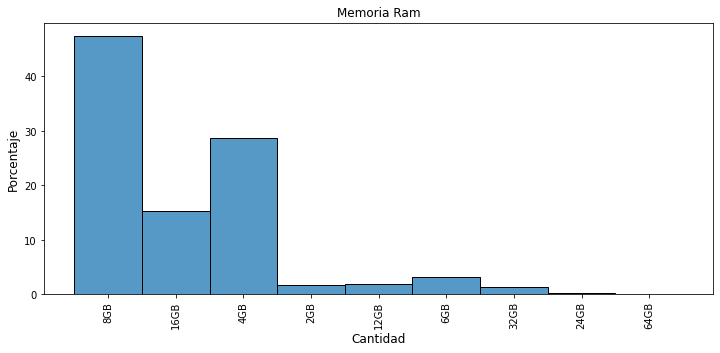

In [52]:
sns.histplot(
    data = df,
        x = "Ram",
        stat = "percent")

plt.title("Memoria Ram", fontsize = 12)
plt.ylabel("Porcentaje", fontsize = 12)
plt.xlabel("Cantidad", fontsize = 12)
plt.xticks(rotation = "vertical")
plt.show()

Los equipos más demandados con respecto a su memoria RAM

In [60]:
df.groupby("TypeName").mean()

,Inches,Price_euros
TypeName,,
2 in 1 Convertible,13.614876,1282.401653
Gaming,16.345854,1731.380634
Netbook,11.816000,636.232000
Notebook,15.330536,782.078624
Ultrabook,13.601020,1548.230357
Workstation,15.951724,2280.358966


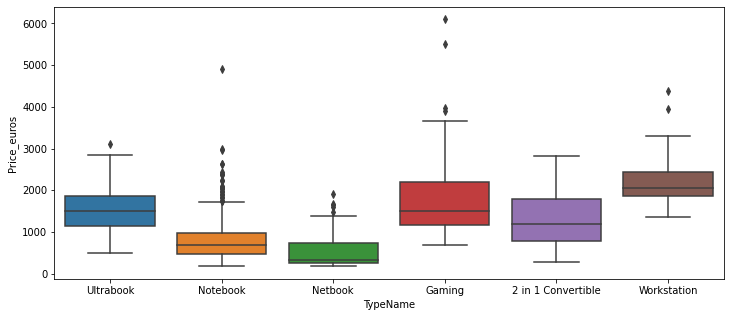

In [59]:
sns.boxplot(x = "TypeName", y = "Price_euros", data = df)

In [65]:
df.groupby([ "Company","TypeName"])[["Price_euros"]].describe()

Price_euros               ...                    
                                   count         mean  ...        75%      max
Company   TypeName                                     ...                    
Acer      2 in 1 Convertible         8.0   698.751250  ...   885.0000  1149.00
          Gaming                     8.0  1468.125000  ...  2026.0000  2599.00
          Netbook                    5.0   306.000000  ...   355.0000   435.00
          Notebook                  78.0   540.139744  ...   659.0000  1009.00
          Ultrabook                  4.0   890.500000  ...   936.5000   989.00
Apple     Ultrabook                 21.0  1564.198571  ...  1958.9000  2858.00
Asus      2 in 1 Convertible        13.0   976.385385  ...  1315.0000  1799.00
          Gaming                    54.0  1720.005370  ...  2024.6750  3975.00
          Netbook                    4.0   266.200000  ...   300.9250   340.00
          Notebook                  67.0   627.102388  ...   813.0000  1749.00
          Ultrabook                 20.0  1290.240000  ...  1558.4750  1983.00
Chuwi     Notebook                   3.0   314.296667  ...   348.9500   449.00
Dell      2 in 1 Convertible        30.0  1131.670333  ...  1299.0000  2013.10
          Gaming                    40.0  1918.393000  ...  2799.2500  3659.40
          Netbook                    2.0   519.500000  ...   631.7500   744.00
          Notebook                 165.0   870.963212  ...  1046.4400  2639.00
          Ultrabook                 49.0  1477.915714  ...  1690.0000  2680.00
          Workstation               11.0  2219.169091  ...  2560.0000  3055.00
Fujitsu   Notebook                   3.0   729.000000  ...   769.0000   799.00
Google    Ultrabook                  3.0  1677.666667  ...  1879.0000  2199.00
HP        2 in 1 Convertible        19.0  1506.810000  ...  1987.0000  2559.00
          Gaming                    12.0  1424.083333  ...  1711.5000  1999.00
          Netbook                    9.0  1006.666667  ...  1599.0000  1908.00
          Notebook                 184.0   816.626685  ...  1059.2500  2229.00
          Ultrabook                 36.0  1537.140556  ...  1912.5000  3100.00
          Workstation               14.0  2299.682143  ...  2376.5000  4389.00
Huawei    Ultrabook                  2.0  1424.000000  ...  1461.5000  1499.00
LG        Ultrabook                  3.0  2099.000000  ...  2199.0000  2299.00
Lenovo    2 in 1 Convertible        48.0  1490.647500  ...  1911.7500  2824.00
          Gaming                    32.0  1328.968125  ...  1328.2500  3240.00
          Netbook                    4.0   735.750000  ...   827.2500  1650.00
          Notebook                 178.0   789.149551  ...   931.2500  4899.00
          Ultrabook                 31.0  1794.919355  ...  2074.0000  2625.00
          Workstation                4.0  2381.000000  ...  2658.5000  3299.00
MSI       Gaming                    54.0  1728.908148  ...  2187.5925  2799.00
Mediacom  2 in 1 Convertible         1.0   299.000000  ...   299.0000   299.00
          Notebook                   6.0   294.333333  ...   343.0000   389.00
Microsoft Ultrabook                  6.0  1612.308333  ...  1850.6375  2589.00
Razer     Gaming                     5.0  4119.000000  ...  5499.0000  6099.00
          Ultrabook                  2.0  1414.000000  ...  1606.5000  1799.00
Samsung   2 in 1 Convertible         2.0  1229.000000  ...  1514.0000  1799.00
          Netbook                    1.0   269.000000  ...   269.0000   269.00
          Notebook                   1.0  1699.000000  ...  1699.0000  1699.00
          Ultrabook                  5.0  1659.000000  ...  1699.0000  1849.00
Toshiba   Notebook                  36.0  1109.000000  ...  1400.0000  1975.00
          Ultrabook                 12.0  1744.250000  ...  1868.0000  2799.00
Vero      Notebook                   4.0   217.425000  ...   223.1000   260.00
Xiaomi    Notebook                   2.0  1299.475000  ...  1349.7125  1399.95
